#### INITIAL DATA LOAD AND EXPLOTARATION

In [1]:
import pandas as pd

In [54]:
dataframe = pd.read_csv("data/train.csv")

In [46]:
dataframe["Age"] = dataframe["Age"] / 365

In [56]:
dataframe["Stage"] = dataframe["Stage"].map({1: "1", 2: "2", 3: "3", 4: "4"})

In [15]:
dataframe.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,50.337388,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462
std,2282.121272,1094.233744,10.082079,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735
min,0.000000,41.000000,26.295890,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,1976.000000,1230.000000,42.668493,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000
50%,3952.000000,1831.000000,51.268493,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000
75%,5928.000000,2689.000000,56.668493,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000
max,7904.000000,4795.000000,78.493151,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000


In [57]:
dataframe["Spiders"], dataframe["Stage"]

(0       N
 1       N
 2       Y
 3       N
 4       N
        ..
 7900    N
 7901    N
 7902    Y
 7903    N
 7904    N
 Name: Spiders, Length: 7905, dtype: object,
 0       3
 1       3
 2       4
 3       3
 4       4
        ..
 7900    2
 7901    4
 7902    2
 7903    4
 7904    3
 Name: Stage, Length: 7905, dtype: object)

In [50]:
for col in dataframe.select_dtypes(include=['object']):
    print(f"{col} categories: {set(list(dataframe[col]))}")

Drug categories: {'D-penicillamine', 'Placebo'}
Sex categories: {'M', 'F'}
Ascites categories: {'N', 'Y'}
Hepatomegaly categories: {'N', 'Y'}
Spiders categories: {'N', 'Y'}
Edema categories: {'N', 'S', 'Y'}
Stage categories: {'2', '4', '3', '1'}
Status categories: {'CL', 'C', 'D'}


In [51]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   float64
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

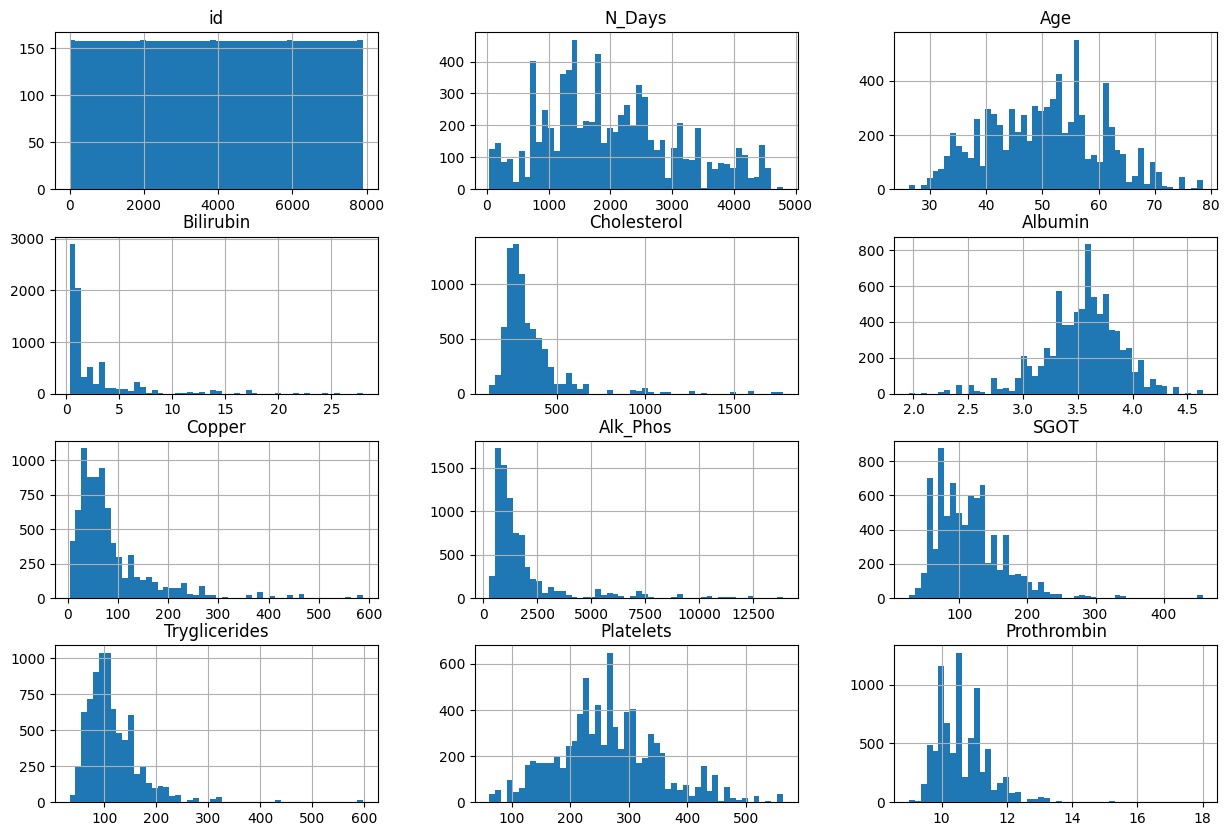

In [52]:
dataframe.hist(bins=50, figsize=(15, 10))
plt.show()

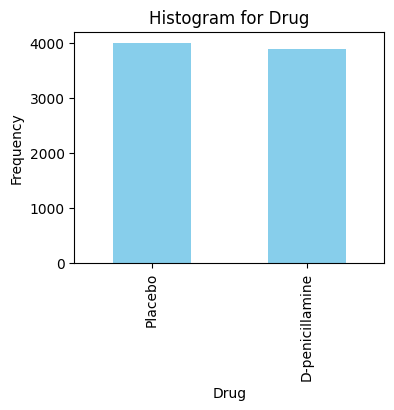

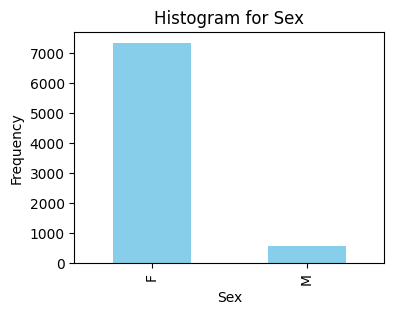

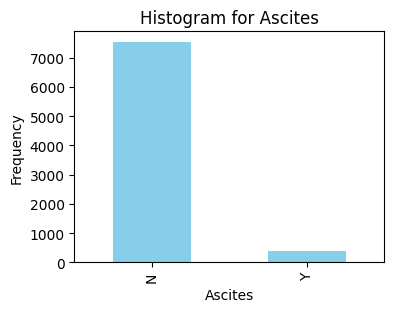

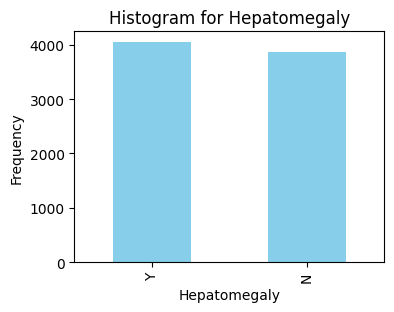

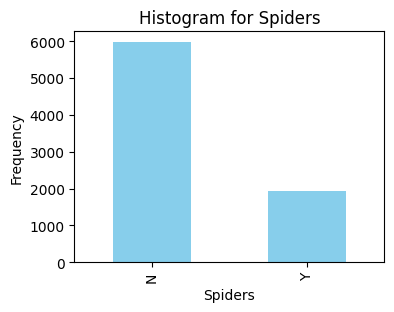

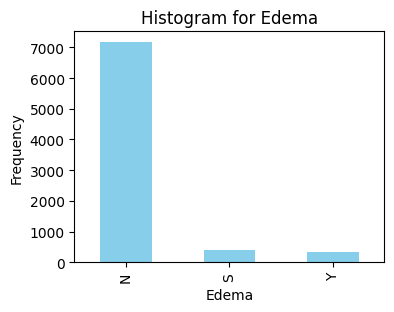

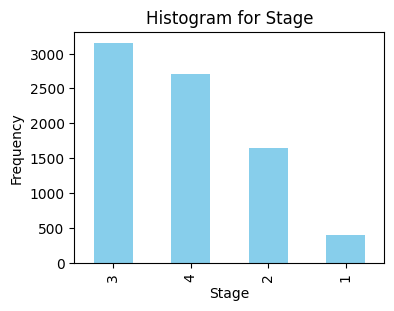

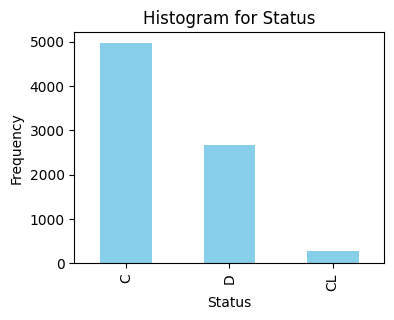

In [53]:
categorical_columns = dataframe.select_dtypes(include=['object'])

# Plot histograms for each categorical column
for column in categorical_columns.columns:
    plt.figure(figsize=(4, 3))
    dataframe[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#### DATA TRANSFORMATION

In [153]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

def transform_data(data):
    data["Age"] = data["Age"] / 365
    data["Stage"] = data["Stage"].map({1: "1", 2: "2", 3: "3", 4: "4"})

    numerical_features = data.select_dtypes(include=["int64", "float64"]).columns
    numerical_features = numerical_features.drop("id")
    
    data[numerical_features] = MinMaxScaler().fit_transform(data[numerical_features])
    data[numerical_features] = StandardScaler().fit_transform(data[numerical_features])

    for col in data.select_dtypes(include=['object']):
        data[col] = LabelEncoder().fit_transform(data[col])

In [154]:
new_df = pd.read_csv("data/train.csv")

In [155]:
numerical_features = new_df.select_dtypes(include=["int64", "float64"]).columns
numerical_features = numerical_features.drop("id").drop("Stage")
transform_data(new_df)

In [157]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   float64
 2   Drug           7905 non-null   int64  
 3   Age            7905 non-null   float64
 4   Sex            7905 non-null   int64  
 5   Ascites        7905 non-null   int64  
 6   Hepatomegaly   7905 non-null   int64  
 7   Spiders        7905 non-null   int64  
 8   Edema          7905 non-null   int64  
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

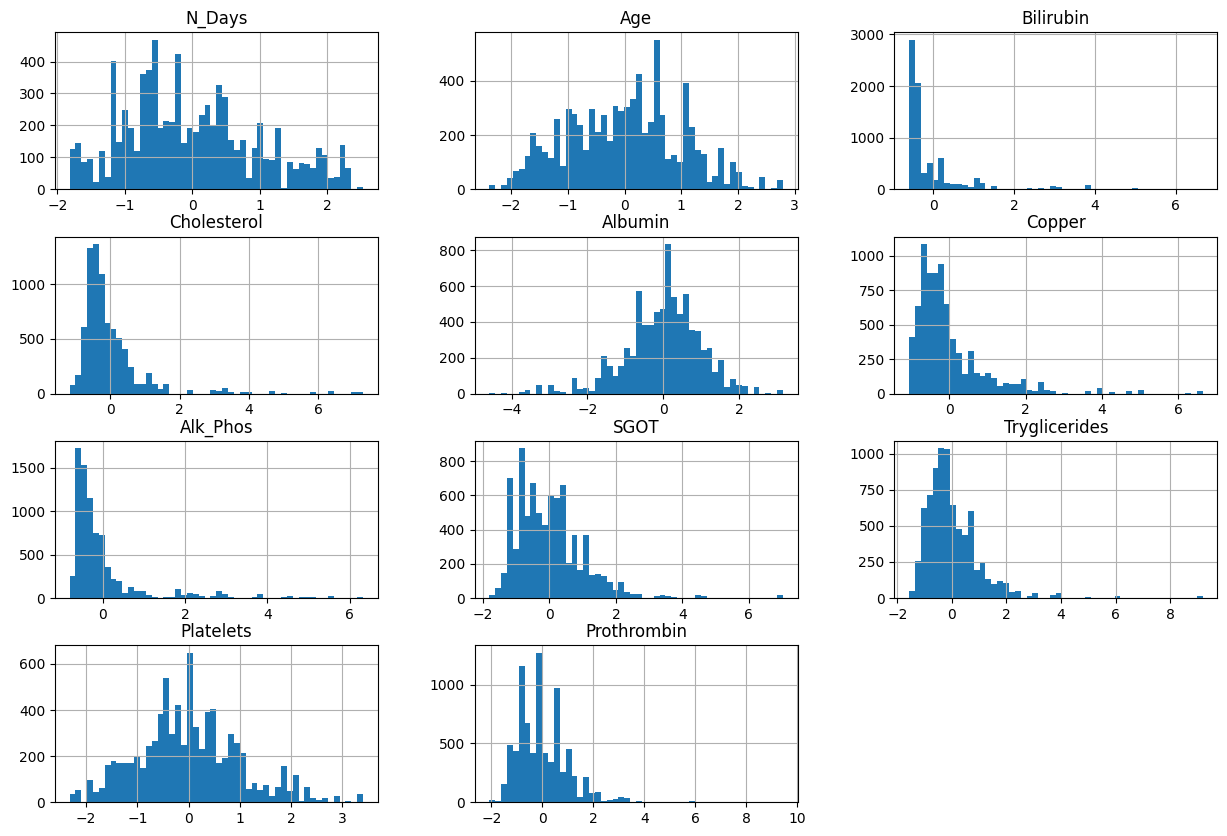

In [156]:
new_df[numerical_features].hist(bins=50, figsize=(15, 10))
plt.show()

#### MODEL TRAINING

In [158]:
df_test = pd.read_csv("data/test.csv")
transform_data(df_test)

In [159]:
df_test["Edema"], new_df["Edema"]

(0       0
 1       0
 2       2
 3       0
 4       0
        ..
 5266    0
 5267    0
 5268    0
 5269    0
 5270    0
 Name: Edema, Length: 5271, dtype: int64,
 0       0
 1       0
 2       2
 3       0
 4       0
        ..
 7900    0
 7901    0
 7902    1
 7903    0
 7904    0
 Name: Edema, Length: 7905, dtype: int64)

In [173]:
from sklearn.model_selection import train_test_split

X = new_df.drop(["Status"], axis=1)
y = new_df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from xgboost import XGBClassifier, XGBRegressor

modelsXB = []
predsXB = []



xgbr_params = {
    'objective': 'multi_logloss', 
    'max_depth': 6, 
    'learning_rate': 0.010009541152584345, 
    'n_estimators': 1878,
    #'early_stopping_rounds': 50,
    'min_child_weight': 9, 
    'colsample_bytree': 0.3292032860985591, 
    'reg_alpha': 0.10626128775335533, 
    'reg_lambda': 0.624196407787772, 
    'random_state': 42,
    'tree_method': 'hist', 
    'eval_metric': 'mlogloss',
    'subsample': 0.47524425009347593
}

modelx = XGBClassifier(**xgbr_params)
    
modelx.fit(X=X_train, y=y_train,
          eval_set=[(X_test, y_test)],
          early_stopping_rounds = PATIENCE,
          verbose = 100)

[0]	validation_0-mlogloss:1.09141


/home/oleksandr/cirrhosis_kaggle/venv/lib/python3.8/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-mlogloss:0.67948
[200]	validation_0-mlogloss:0.54544
[300]	validation_0-mlogloss:0.49279
[400]	validation_0-mlogloss:0.46858
[500]	validation_0-mlogloss:0.45560
[600]	validation_0-mlogloss:0.44776
[700]	validation_0-mlogloss:0.44279
[800]	validation_0-mlogloss:0.43910
[900]	validation_0-mlogloss:0.43643
[1000]	validation_0-mlogloss:0.43472
[1100]	validation_0-mlogloss:0.43340
[1200]	validation_0-mlogloss:0.43243
[1300]	validation_0-mlogloss:0.43208
[1400]	validation_0-mlogloss:0.43215
[1478]	validation_0-mlogloss:0.43224


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3292032860985591, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.010009541152584345,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1878, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

#### Submission

In [176]:
df_sub = pd.read_csv('data/sample_submission.csv')

In [177]:
df_sub['Status_C'] =  (modelx.predict_proba(df_test)[:, 0])
df_sub['Status_D'] =  (modelx.predict_proba(df_test)[:, 2])
df_sub['Status_CL'] = (modelx.predict_proba(df_test)[:, 1])

In [178]:
df_sub

,id,Status_C,Status_CL,Status_D
0,7905,0.577842,0.016921,0.405237
1,7906,0.561102,0.329474,0.109424
2,7907,0.042540,0.017854,0.939606
3,7908,0.959853,0.004932,0.035215
4,7909,0.831618,0.066152,0.102229
...,...,...,...,...
5266,13171,0.911315,0.029181,0.059504
5267,13172,0.966426,0.005507,0.028067
5268,13173,0.884200,0.012960,0.102840
5269,13174,0.975785,0.008397,0.015818


In [179]:
df_sub.to_csv('submission.csv',index=False)